In [1]:
import sys
sys.path.append("HyperNetX")
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx

ModuleNotFoundError: No module named 'hypernetx'

In [2]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

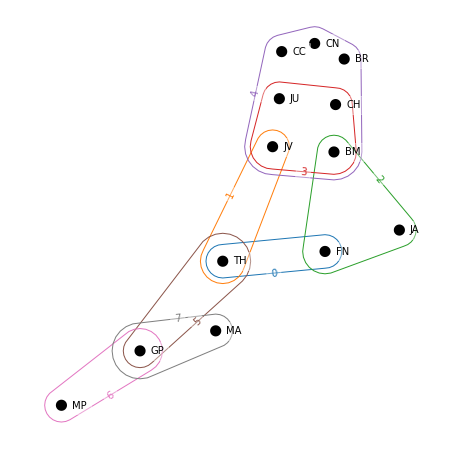

In [3]:
# Draw the hypergraph! For more on using all of the parameters
# of the draw function see the Visualization tutorial
hnx.draw(H)

### From networkx bypartite graph objects

In [4]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'),(2, 'a'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

HB = hnx.Hypergraph.from_bipartite(B)

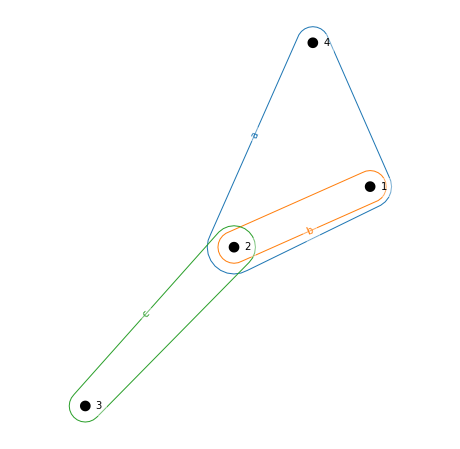

In [6]:
hnx.draw(HB)

### Drawing dual graph

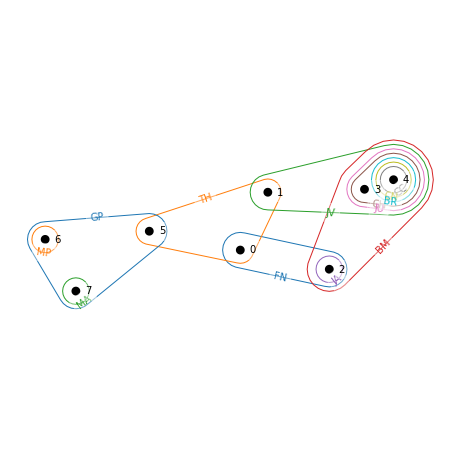

In [7]:
HD = H.dual()
hnx.draw(HD)

In [8]:
# Use list() to get just the names of the nodes

list(H.nodes)

['FN', 'TH', 'JV', 'BM', 'JA', 'JU', 'CH', 'BR', 'CN', 'CC', 'GP', 'MP', 'MA']

In [9]:
list(H.edges)

[0, 1, 2, 3, 4, 5, 6, 7]

In [10]:
# The number of nodes and edges is returned by the shape property

H.shape

(13, 8)

In [12]:
# The degree of a node is the number of edges it is contained within. The (optional) s parameter places a restriction on the size of the edges you consider. The degree function looks for all edges of size $\geq s$. The (optional, not shown here) edges parameter allows you to restrict to a specific edge set.
# Note: H.s_degree(node) is a wrapper for the degree method and returns the same thing.

H.degree('JV', s=1)

3

In [13]:
# The dim (dimension) and size methods return information about an edge. The size is the number of nodes contained in an edge and the dimension is one less than the size. The dimension is so named because if we consider a hypergraph as a simplicial complex then each edge is a simplex. The dimension of a simplex is one less than its number of nodes.

H.dim(3), H.size(3)

(3, 4)

In [14]:
# The neighbors method returns an interator that goes through all nodes which share an edge with the given node.

for nei in H.neighbors('JV'):
    print(nei)
    
# As with any iterator you can get all of the values in a list
list(H.neighbors('JV'))

CC
CN
JU
BR
TH
CH
BM


['CC', 'CN', 'JU', 'BR', 'TH', 'CH', 'BM']